## Importing the Halo Pipeline
In this section, we'll show the import statement and the initialization of the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

We first create an instance of the `HalosSkyPyPipeline` class, which is imported from the `sim_pipeline.Pipelines.halos_pipeline` module. This pipeline will be used to process data from the YAML file, `halo.yml`. The default settings for various parameters, such as `m_max`, `m_min`, etc., have been carefully chosen to ensure optimal performance and accurate results. We'll delve into the specifics of these parameter choices and their importance in the subsequent sections. Additionally, you can refer to the `readme.md` file in the `data/Skypy` folder for more information on the default settings.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

        z                 mass       
------------------ ------------------
2.3807924287572595  2531716358286.599
1.8772279057754684  8052243335872.748
2.3660775702682755  4674450131752.696
 1.515643261359586 1180499899380.7776
3.5876041319051177  3084615785664.172
2.9240579671376383 1952918129517.3496
2.6497028498557214 1011162912522.1746
0.9973050316492895 1067877246104.2437
 2.403712624858711 1405883743827.3032
 2.034418061485545  7250019119367.239
               ...                ...
 4.350733996774823 1206170378367.8804
2.5504878053617284 1130893648938.0103
1.2687752503622038 1310536042594.4614
2.4072079192538736 1624341469752.0688
0.9257016660317985  2663536196319.134
0.8367869728763561 1021775371392.0814
1.4247453143633488  3413637979555.986
3.6710110665889237  1961860200780.092
0.6136474717338529 1127059576055.9702
 4.267718410436526 1610366211050.3057
1.4946497156040432  2101822782946.214
Length = 47 rows


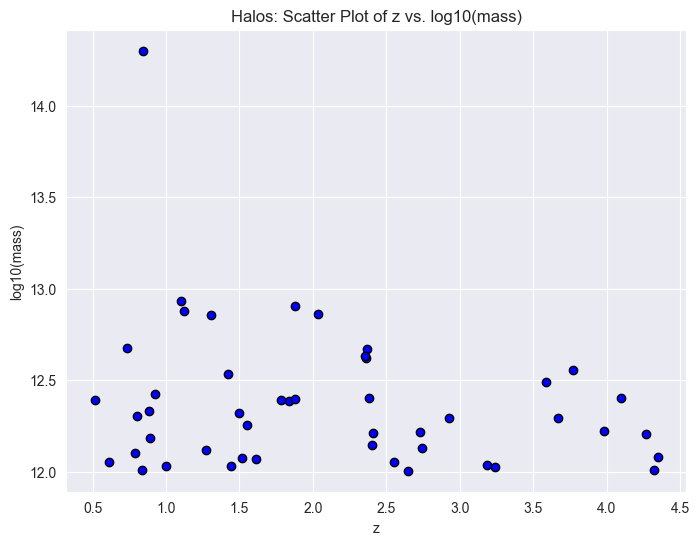

         z          ...          kappa         
------------------- ... -----------------------
              0.025 ...  0.00013397902836150057
0.07500000000000001 ... -0.00043862369117280363
0.12500000000000003 ...  -0.0013972477556442261
0.17500000000000002 ...  -0.0026409562548218675
0.22500000000000003 ...   -0.004084773702519722
 0.2750000000000001 ...   -0.005657705368735326
0.32500000000000007 ...   -0.007300958585450095
 0.3750000000000001 ...   -0.008966349481380522
 0.4250000000000001 ...   -0.010614879620253623
 0.4750000000000001 ...   -0.012215467994738962
                ... ...                     ...
  4.475000000000001 ...  -0.0004945751994291925
  4.525000000000001 ...  -0.0004290266397397602
  4.575000000000001 ... -0.00036511029738406364
  4.625000000000001 ...   -0.000302460417366035
  4.675000000000002 ... -0.00024126759153197952
  4.725000000000001 ... -0.00018250666520280845
  4.775000000000001 ...  -0.0001282145560370651
  4.825000000000001 ...  -8.182491892227

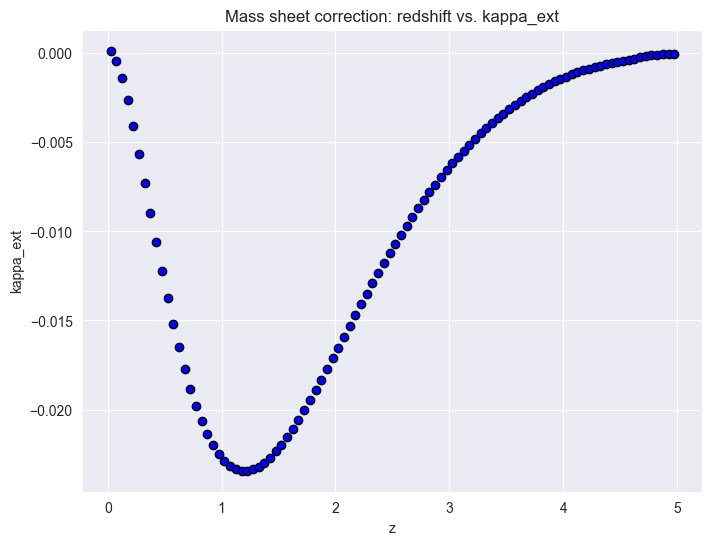

In [2]:
import matplotlib.pyplot as plt
import numpy as np

halos= pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction
print(halos)
z_halos = halos['z']
mass_halos = halos['mass']

log_mass = np.log10(mass_halos)
plt.figure(figsize=(8, 6))
plt.scatter(z_halos, log_mass, c='blue', marker='o', edgecolors='black')
plt.title('Halos: Scatter Plot of z vs. log10(mass)')
plt.xlabel('z')
plt.ylabel('log10(mass)')
plt.grid(True)

# Show the plot
plt.show()
print(mass_sheet_correction)
redshifts_mass_correction = mass_sheet_correction['z']
#first_moment = mass_sheet_correction['first_moment']
kappa_ext = mass_sheet_correction['kappa']
plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)



## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1000,RadialInterpolate=True)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)
'''
lens_cosmo = [
                LensCosmo(
                    z_lens=z,
                    z_source=5.00,
                    cosmo=cosmo,
                )
                for z in redshifts_mass_correction
            ]

halos_lens2 = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1)
kappa_ext = halos_lens2.kappa_ext_for_mass_sheet(z=redshifts_mass_correction, lens_cosmo=lens_cosmo, first_moment=first_moment)
print(kappa_ext)
print('kappa_ext at center is: ',kappa_ext)

plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)
'''

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


ValueError: RadialInterpolate is not a valid lens model. Supported are: ['ARC_PERT', 'CHAMELEON', 'CNFW', 'CNFW_ELLIPSE', 'CONST_MAG', 'CONVERGENCE', 'coreBURKERT', 'CORED_DENSITY', 'CORED_DENSITY_2', 'CORED_DENSITY_2_MST', 'CORED_DENSITY_EXP', 'CORED_DENSITY_EXP_MST', 'CORED_DENSITY_MST', 'CORED_DENSITY_ULDM_MST', 'CSE', 'CTNFW_GAUSS_DEC', 'CURVED_ARC_CONST', 'CURVED_ARC_SIS_MST', 'CURVED_ARC_SPP', 'CURVED_ARC_SPT', 'CURVED_ARC_TAN_DIFF', 'DIPOLE', 'DOUBLE_CHAMELEON', 'EPL', 'EPL_BOXYDISKY', 'EPL_NUMBA', 'EPL_Q_PHI', 'ElliSLICE', 'FLEXION', 'FLEXIONFG', 'GAUSSIAN', 'GAUSSIAN_ELLIPSE_KAPPA', 'GAUSSIAN_ELLIPSE_POTENTIAL', 'GAUSSIAN_KAPPA', 'GNFW', 'HERNQUIST', 'HERNQUIST_ELLIPSE', 'HERNQUIST_ELLIPSE_CSE', 'HESSIAN', 'INTERPOL', 'INTERPOL_SCALED', 'LOS', 'LOS_MINIMAL', 'MULTIPOLE', 'MULTI_GAUSSIAN_KAPPA', 'MULTI_GAUSSIAN_KAPPA_ELLIPSE', 'NFW', 'NFW_ELLIPSE', 'NFW_ELLIPSE_CSE', 'NFW_ELLIPSE_GAUSS_DEC', 'NFW_MC', 'NFW_MC_ELLIPSE', 'NIE', 'NIE_POTENTIAL', 'NIE_SIMPLE', 'PEMD', 'PJAFFE', 'PJAFFE_ELLIPSE', 'POINT_MASS', 'SERSIC', 'SERSIC_ELLIPSE_GAUSS_DEC', 'SERSIC_ELLIPSE_KAPPA', 'SERSIC_ELLIPSE_POTENTIAL', 'SHAPELETS_CART', 'SHAPELETS_POLAR', 'SHEAR', 'SHEAR_GAMMA_PSI', 'SHEAR_REDUCED', 'SHIFT', 'SIE', 'SIS', 'SIS_TRUNCATED', 'SPEMD', 'SPEP', 'SPL_CORE', 'SPP', 'SYNTHESIS', 'TABULATED_DEFLECTIONS', 'TNFW', 'TNFWC', 'TNFW_ELLIPSE', 'TRIPLE_CHAMELEON', 'ULDM'].

In [4]:
'''
result = ", ".join(map(str, first_moment))

print(result)
'''

'\nresult = ", ".join(map(str, first_moment))\n\nprint(result)\n'

lens kwargs [{'Rs': 4.332403974456532, 'alpha_Rs': 0.3316494122496703, 'center_x': 13.15206966432062, 'center_y': 12.923958696562789}, {'Rs': 4.038410698219844, 'alpha_Rs': 0.335757685218339, 'center_x': -12.634961863842316, 'center_y': 15.170425811701362}, {'Rs': 4.5290027558671335, 'alpha_Rs': 0.3293519020615621, 'center_x': -11.14594915295986, 'center_y': -8.881227630900701}, {'Rs': 3.860789954749855, 'alpha_Rs': 0.3386929646385051, 'center_x': -7.878849448401579, 'center_y': 16.72649655356574}, {'Rs': 3.9341304360980778, 'alpha_Rs': 0.3374357060787615, 'center_x': 5.782328392802505, 'center_y': -16.959803564511763}, {'Rs': 4.381221688922515, 'alpha_Rs': 0.33104772533067417, 'center_x': -2.2164344575845902, 'center_y': 14.748334245710378}, {'Rs': 4.755969765874428, 'alpha_Rs': 0.3270844991861067, 'center_x': 3.468868224763113, 'center_y': -2.333278835857819}, {'Rs': 4.168895515393002, 'alpha_Rs': 0.3338268059942044, 'center_x': -3.8670364804638733, 'center_y': 9.02838220689269}, {'R

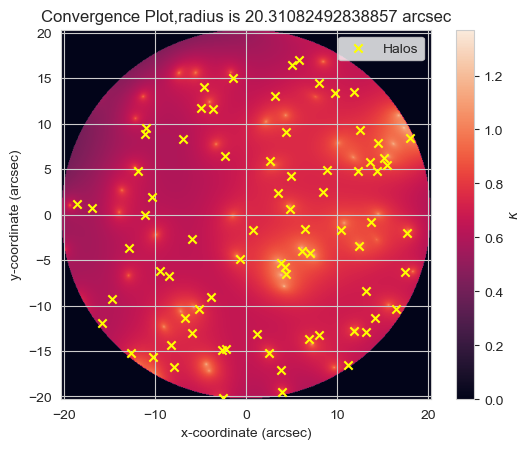

In [5]:
halos_lens2 = HalosLens(halos_list=halos,mass_correction_list=None, mass_sheet=False,sky_area=0.0001,cosmo=cosmo, samples_number= 1000)

halos_lens2.plot_convergence()

### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [6]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

[[-1.01508836  0.06041652]
 [-0.95793699  0.08823619]
 [-1.05914048  0.04757078]
 ...
 [-0.99185692  0.05500704]
 [-1.08570236  0.05421021]
 [-1.06882455  0.04510325]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

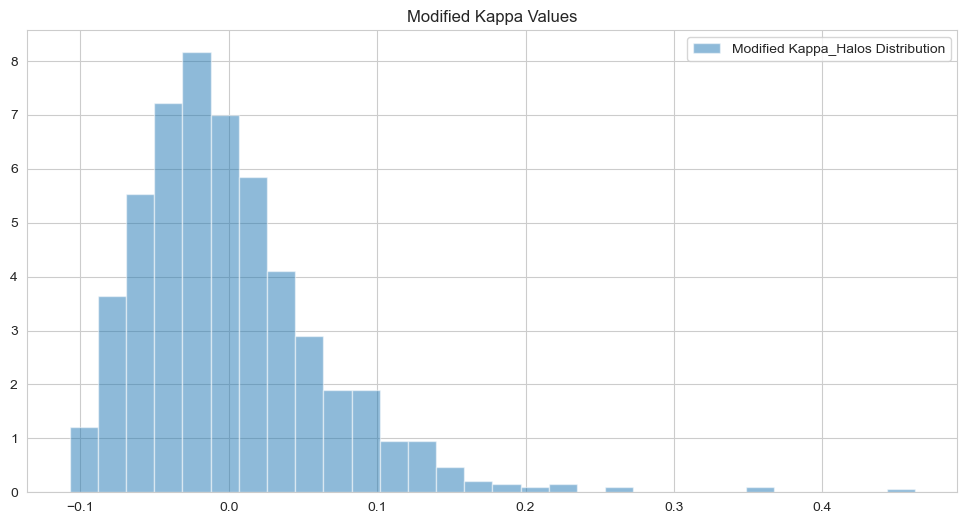

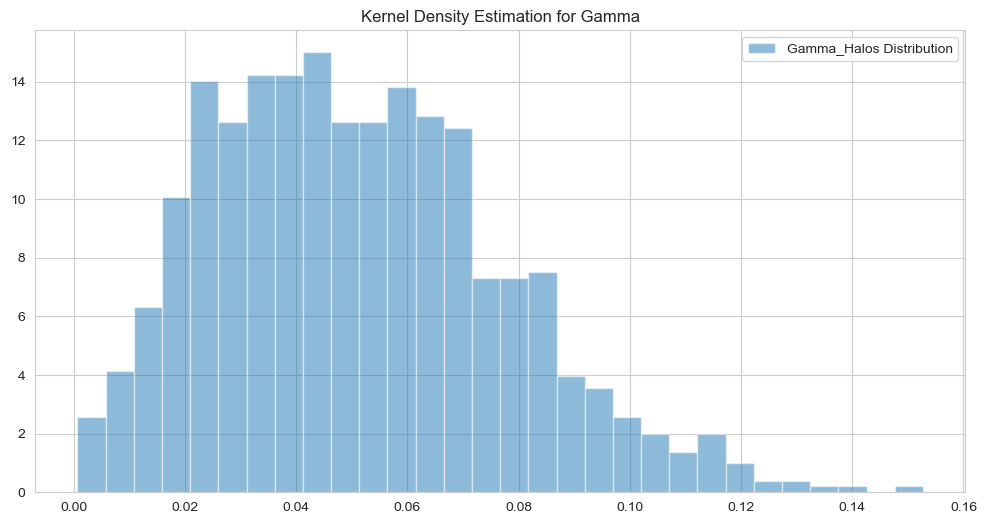

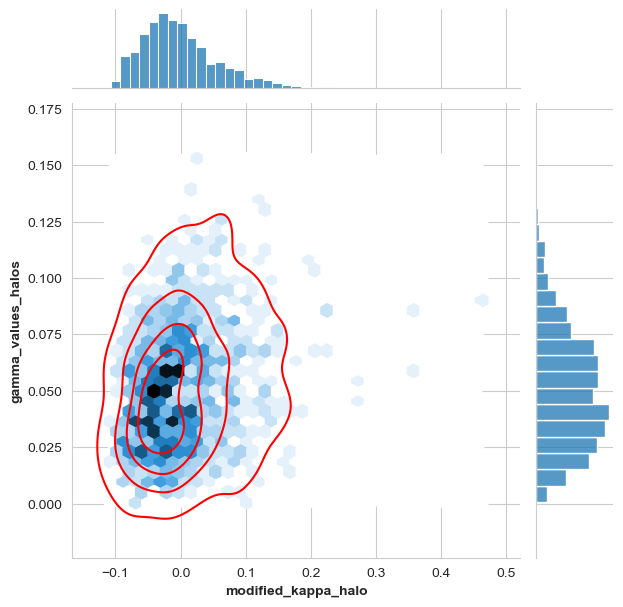

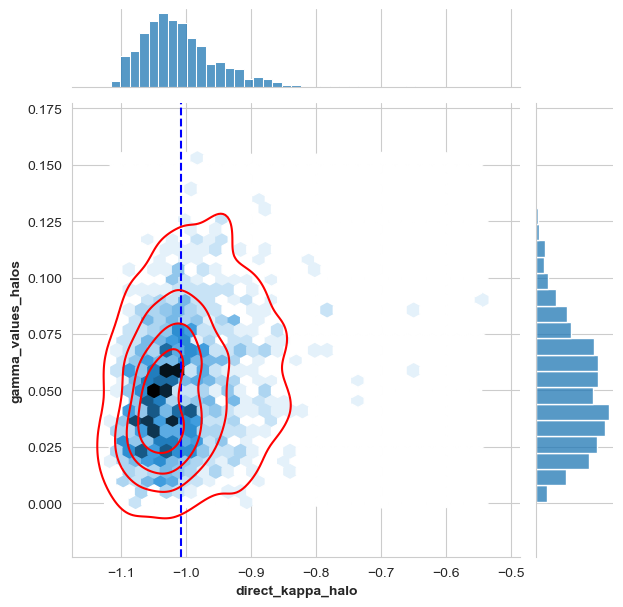

Spearman correlation coefficient:  0.21991833991833992
Kendall Tau correlation coefficient:  0.14833233233233234


In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title('Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

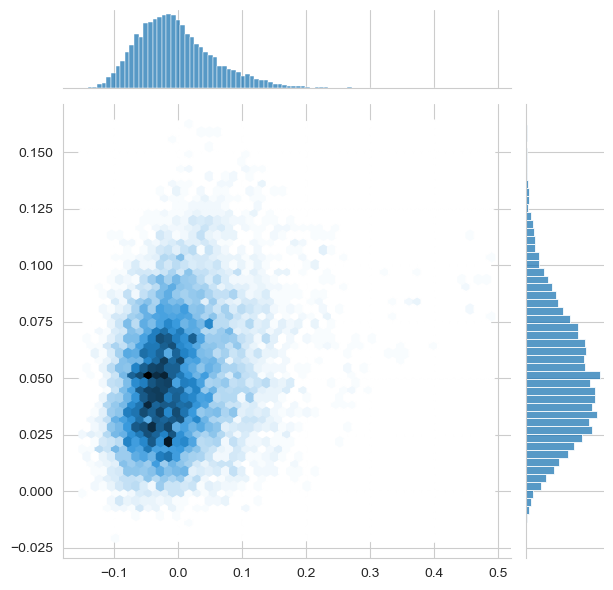

In [8]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [9]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde_by_multiprocessing
from astropy.cosmology import FlatLambdaCDM,default_cosmology
import matplotlib.pyplot as plt

cosmo = default_cosmology.get()

nk,ng = run_halos_without_kde_by_multiprocessing(n_iterations=400, sky_area=0.0001, samples_number=2,cosmo=cosmo,m_max='1.0E+16',m_min='1.0E+12', z_max=5)


The 400 halo-lists took 129.04241228103638 seconds to run


Visualization of ` run_halos_without_kde()`

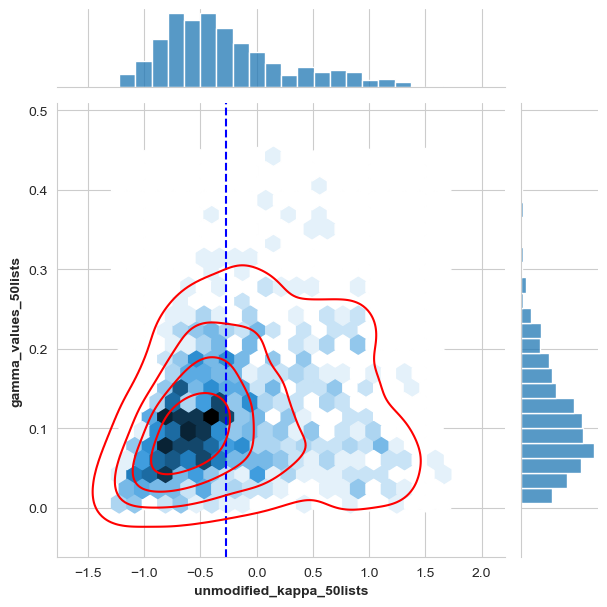

Spearman correlation coefficient:  0.2569993156239307
Kendall Tau correlation coefficient:  0.18083854818523157


In [10]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.axvline(x=np.mean(nk), color='blue', linestyle='--')
modified_plot.ax_joint.set_xlabel('unmodified_kappa_50lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_50lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])